In [1]:
import os
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
path = 'C:/Users/User/Desktop/last sem/dataset'
os.chdir(path)
os.getcwd()

'C:\\Users\\User\\Desktop\\last sem\\dataset'

In [3]:
files = os.listdir(path)
print(files)

['.ipynb_checkpoints', '.vs', 'Data processing.py', 'face', 'face_100', 'face_300', 'feature extracted', 'generated_result', 'iris', 'iris_100', 'iris_300', 'Model training', 'model.png', 'multichannel', 'NEW_EYES_PROCESSING.ipynb', 'NEW_FACE_PROCESSING.ipynb', 'NEW_PALM_PROCESSING.ipynb', 'new_result', 'Note_CASIA-PalmprintV1.pdf', 'palmprint', 'palmprint_100', 'palmprint_300', 'processing code', 'template.py', 'X_eye.pickle', 'X_eye_300.pickle', 'X_eye_fine.pickle', 'X_face.pickle', 'X_face_300.pickle', 'X_face_fine.pickle', 'X_palm.pickle', 'X_palm_fine.pickle', 'y_eye.pickle', 'y_eye_300.pickle', 'y_eye_fine.pickle', 'y_face.pickle', 'y_face_300.pickle', 'y_face_fine.pickle', 'y_palm.pickle', 'y_palm_fine.pickle']


In [4]:
for filename in files:
    if filename == 'palmprint':
        os.chdir('C:/Users/User/Desktop/last sem/dataset/palmprint_300/CASIA-PalmprintV1')
        cur_path = os.getcwd()
        print("current path file:", os.listdir())

current path file: ['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024', '0025', '0026', '0027', '0028', '0029', '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0037', '0038', '0039', '0040', '0041', '0042', '0043', '0044', '0045', '0046', '0047', '0048', '0049', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057', '0058', '0059', '0060', '0061', '0062', '0063', '0064', '0065', '0066', '0067', '0068', '0069', '0070', '0071', '0072', '0073', '0074', '0075', '0076', '0077', '0078', '0079', '0080', '0081', '0082', '0083', '0084', '0085', '0086', '0087', '0088', '0089', '0090', '0091', '0092', '0093', '0094', '0095', '0096', '0097', '0098', '0099', '0100', '0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0110', '0111', '0112', '0113', '0114', '0115', '0116', '0117', '0118', '0119', '0120', '0121', '0122', '012

In [15]:
dataset=[]
datasetL=[]
datasetR=[]
substring_L = "l"
substring_R = "r"
num_to_select = 5

for i,user in enumerate(os.listdir(cur_path)):
    print(user)
    image_folder = os.path.join(cur_path,user)
    os.chdir(image_folder)
    left = []
    right= []
    for pic in os.listdir():
        if substring_L in pic:
            #print(pic)
            left.append(pic)
        if substring_R in pic:
            #print(pic)
            right.append(pic)
            #LR_image = os.path.join(image_folder,pic)
    random.shuffle(left)
    random.shuffle(right)
    selected_left_images = left[:num_to_select]
    selected_right_images = right[:num_to_select]
    
    for L_image, R_image in zip(selected_left_images, selected_right_images):
        
        L_imag = os.path.join(image_folder,L_image)
        R_imag = os.path.join(image_folder,R_image)
        print(L_imag)
        print(R_imag)
        #print(len(L_imag))
        if R_img is []:
            print("NO IMAGE", i)

        if L_img is []:
            print("NO IMAGE", i)
        L_img = cv2.imread(L_imag, 0)
        height, width = L_img.shape
        
        # Calculate centroid
        center_x = width/2
        center_y = height/2
        
        # Calculate top-left corner of ROI
        roi_size = 84
        roi_x = int(center_x - roi_size/2)
        roi_y = int(center_y - roi_size/2)
        #print(roi_x,roi_y)
        # Extract ROI
        roi_L = L_img[roi_y:roi_y+roi_size, roi_x:roi_x+roi_size]
        L_img_2 = cv2.resize(roi_L, (128, 128))
        L_img_2 = np.expand_dims(L_img_2,-1)
        L_img_2 = L_img_2.repeat(3, axis=-1)
        #cv2.imshow("image", roi_L)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        
        R_img = cv2.imread(R_imag, 0)

        height, width = R_img.shape
        # Calculate centroid
        center_x = width/2
        center_y = height/2
        
        # Calculate top-left corner of ROI
        roi_size = 84
        roi_x = int(center_x - roi_size/2)
        roi_y = int(center_y - roi_size/2)
        #print(roi_x,roi_y)
        # Extract ROI
        roi_R = R_img[roi_y:roi_y+roi_size, roi_x:roi_x+roi_size]        
        R_img_2 = cv2.resize(roi_R, (128, 128))
        R_img_2 = np.expand_dims(R_img_2,-1)
        R_img_2 = R_img_2.repeat(3, axis=-1)
        
        datasetL.append([L_img_2, i])
        datasetR.append([R_img_2, i])
        

0001
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0001\0001_m_l_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0001\0001_m_r_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0001\0001_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0001\0001_m_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0001\0001_m_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0001\0001_m_r_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0001\0001_m_l_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0001\0001_m_r_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0001\0001_m_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0001\0001_m_r_08.jpg
0002
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0017\0017_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0017\0017_m_r_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0017\0017_m_l_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0017\0017_m_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0017\0017_m_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0017\0017_m_r_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0017\0017_m_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0017\0017_m_r_03.jpg
0018
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0018\0018_m_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0018\0018_m_r_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0018

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0033\0033_f_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0033\0033_f_r_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0033\0033_f_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0033\0033_f_r_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0033\0033_f_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0033\0033_f_r_03.jpg
0034
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0034\0034_f_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0034\0034_f_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0034\0034_f_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0034\0034_f_r_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0034

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0050\0050_m_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0050\0050_m_r_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0050\0050_m_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0050\0050_m_r_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0050\0050_m_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0050\0050_m_r_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0050\0050_m_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0050\0050_m_r_06.jpg
0051
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0051\0051_f_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0051\0051_f_r_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0051

0066
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0066\0066_m_l_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0066\0066_m_r_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0066\0066_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0066\0066_m_r_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0066\0066_m_l_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0066\0066_m_r_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0066\0066_m_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0066\0066_m_r_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0066\0066_m_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0066\0066_m_r_02.jpg
0067
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0077\0077_m_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0077\0077_m_r_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0077\0077_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0077\0077_m_r_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0077\0077_m_l_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0077\0077_m_r_04.jpg
0078
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0078\0078_m_l_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0078\0078_m_r_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0078\0078_m_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0078\0078_m_r_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0078

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0092\0092_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0092\0092_m_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0092\0092_m_l_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0092\0092_m_r_03.jpg
0093
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0093\0093_m_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0093\0093_m_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0093\0093_m_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0093\0093_m_r_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0093\0093_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0093\0093_m_r_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0093

0108
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0108\0108_m_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0108\0108_m_r_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0108\0108_m_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0108\0108_m_r_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0108\0108_m_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0108\0108_m_r_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0108\0108_m_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0108\0108_m_r_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0108\0108_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0108\0108_m_r_08.jpg
0109
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0123\0123_f_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0123\0123_f_r_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0123\0123_f_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0123\0123_f_r_02.jpg
0124
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0124\0124_f_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0124\0124_f_r_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0124\0124_f_l_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0124\0124_f_r_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0124\0124_f_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0124\0124_f_r_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0124

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0140\0140_f_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0140\0140_f_r_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0140\0140_f_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0140\0140_f_r_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0140\0140_f_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0140\0140_f_r_06.jpg
0141
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0141\0141_m_l_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0141\0141_m_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0141\0141_m_l_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0141\0141_m_r_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0141

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0157\0157_f_l_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0157\0157_f_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0157\0157_f_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0157\0157_f_r_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0157\0157_f_l_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0157\0157_f_r_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0157\0157_f_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0157\0157_f_r_01.jpg
0158
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0158\0158_f_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0158\0158_f_r_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0158

0170
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0170\0170_m_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0170\0170_m_r_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0170\0170_m_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0170\0170_m_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0170\0170_m_l_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0170\0170_m_r_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0170\0170_m_l_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0170\0170_m_r_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0170\0170_m_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0170\0170_m_r_02.jpg
0171
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0186\0186_m_l_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0186\0186_m_r_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0186\0186_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0186\0186_m_r_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0186\0186_m_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0186\0186_m_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0186\0186_m_l_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0186\0186_m_r_07.jpg
0187
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0187\0187_f_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0187\0187_f_r_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0187

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0203\0203_m_l_10.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0203\0203_m_r_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0203\0203_m_l_09.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0203\0203_m_r_10.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0203\0203_m_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0203\0203_m_r_05.jpg
0204
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0204\0204_m_l_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0204\0204_m_r_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0204\0204_m_l_10.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0204\0204_m_r_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0204

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0219\0219_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0219\0219_m_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0219\0219_m_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0219\0219_m_r_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0219\0219_m_l_09.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0219\0219_m_r_05.jpg
0220
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0220\0220_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0220\0220_m_r_09.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0220\0220_m_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0220\0220_m_r_10.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0220

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0235\0235_m_l_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0235\0235_m_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0235\0235_m_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0235\0235_m_r_08.jpg
0236
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0236\0236_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0236\0236_m_r_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0236\0236_m_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0236\0236_m_r_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0236\0236_m_l_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0236\0236_m_r_10.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0236

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0252\0252_m_l_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0252\0252_m_r_10.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0252\0252_m_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0252\0252_m_r_03.jpg
0253
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0253\0253_m_l_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0253\0253_m_r_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0253\0253_m_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0253\0253_m_r_10.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0253\0253_m_l_09.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0253\0253_m_r_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0253

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0269\0269_m_l_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0269\0269_m_r_07.jpg
0270
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0270\0270_m_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0270\0270_m_r_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0270\0270_m_l_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0270\0270_m_r_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0270\0270_m_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0270\0270_m_r_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0270\0270_m_l_03.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0270\0270_m_r_10.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0270

C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0285\0285_m_l_07.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0285\0285_m_r_03.jpg
0286
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0286\0286_m_l_05.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0286\0286_m_r_01.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0286\0286_m_l_08.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0286\0286_m_r_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0286\0286_m_l_04.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0286\0286_m_r_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0286\0286_m_l_06.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0286\0286_m_r_02.jpg
C:\Users\User\Desktop\last sem\dataset\palmprint_300\CASIA-PalmprintV1\0286

In [16]:
print(len(datasetL))
print(len(datasetR))

1500
1500


In [17]:
x_L=[]
y_L=[]

x_R=[]
y_R=[]

for features,label in datasetL:
    x_L.append(features)
    y_L.append(label)

for features,label in datasetR:
    x_R.append(features)
    y_R.append(label)    

print(y_L==y_R)
    
#X=np.array(x).reshape(-1,128,128,1)
y=np.array(y_L).reshape(-1,1)

True


In [18]:
x_concat = np.concatenate((x_L,x_R),axis=1)
print(x_concat.shape)

(1500, 256, 128, 3)


In [19]:
print(y)

[[  0]
 [  0]
 [  0]
 ...
 [299]
 [299]
 [299]]


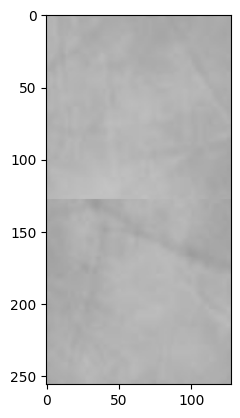

In [20]:
plt.imshow(x_concat[0])

In [21]:
os.chdir(path)

pickle_out = open("X_palm_300.pickle","wb")
pickle.dump(x_concat,pickle_out)
pickle_out.close()

pickle_out = open("y_palm_300.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
X.shape

In [ ]:
y.shape